# **Importing necessary libraries**

In [23]:
import os
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# **Setting up file paths and directories**


In [24]:
file_path = '/content/drive/MyDrive/Brain-Tumor-Classification-DataSet/Training'

# **Loading image file paths and their labels**

In [25]:
name_class = os.listdir(file_path)
filepaths = list(glob.glob(file_path+'/**/*.*'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

# **Creating a DataFrame to store file paths and labels**


In [26]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Tumor_type')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)

# **Encoding labels into numerical values**


In [27]:
le = LabelEncoder()
le.fit(data['Tumor_type'])
data['Label'] = le.transform(data['Tumor_type'])

# **Loading and preprocessing images**

In [28]:

X_train = []
Y_train = []
image_size = 150
labels = name_class
print(labels)

['glioma_tumor', 'meningioma_tumor', 'pituitary_tumor', 'no_tumor']


# **Loading images for training and testing** 

In [29]:
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Brain-Tumor-Classification-DataSet/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Brain-Tumor-Classification-DataSet/Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

In [30]:
# Converting lists to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

# Shuffling the data
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

# Encoding labels into one-hot vectors
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = tf.keras.utils.to_categorical(y_train_new)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = tf.keras.utils.to_categorical(y_test_new)

# **Model Definition**


In [31]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

# **Model Compilation**

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 73, 73, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_21 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

# **Model Training**


In [33]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
83/83 [==============================] - 12s 103ms/step - loss: 1.7768 - accuracy: 0.2868 - val_loss: 1.3679 - val_accuracy: 0.2857
Epoch 2/30
83/83 [==============================] - 8s 100ms/step - loss: 1.2114 - accuracy: 0.4559 - val_loss: 1.0382 - val_accuracy: 0.5238
Epoch 3/30
83/83 [==============================] - 8s 100ms/step - loss: 1.0248 - accuracy: 0.5516 - val_loss: 0.9513 - val_accuracy: 0.5782
Epoch 4/30
83/83 [==============================] - 8s 99ms/step - loss: 0.8849 - accuracy: 0.6156 - val_loss: 0.8942 - val_accuracy: 0.6122
Epoch 5/30
83/83 [==============================] - 8s 98ms/step - loss: 0.7769 - accuracy: 0.6701 - val_loss: 0.8655 - val_accuracy: 0.6088
Epoch 6/30
83/83 [==============================] - 8s 95ms/step - loss: 0.6654 - accuracy: 0.7283 - val_loss: 0.8352 - val_accuracy: 0.6088
Epoch 7/30
83/83 [==============================] - 8s 95ms/step - loss: 0.6093 - accuracy: 0.7514 - val_loss: 0.6764 - val_accuracy: 0.6803
Epoch 8/3

# **Evaluation Metrics**


In [34]:
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

Training Accuracy: 0.9795686602592468
Validation Accuracy: 0.884353756904602


# **Model Evaluation on Test Data**


In [35]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

11/11 [==============================] - 1s 81ms/step


# **Confusion Matrix**


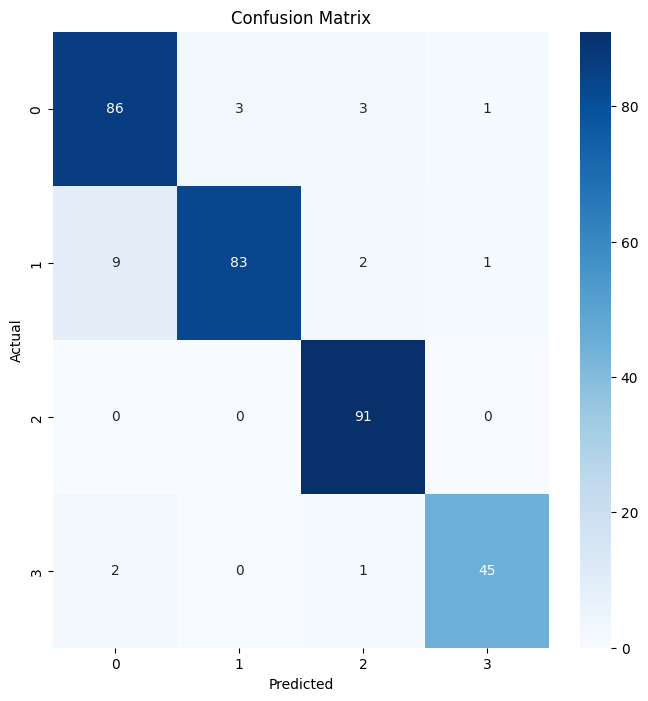

In [36]:
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Classification Report**

In [37]:
report = classification_report(y_true_classes, y_pred_classes, target_names=labels)
print(report)

                  precision    recall  f1-score   support

    glioma_tumor       0.89      0.92      0.91        93
meningioma_tumor       0.97      0.87      0.92        95
 pituitary_tumor       0.94      1.00      0.97        91
        no_tumor       0.96      0.94      0.95        48

        accuracy                           0.93       327
       macro avg       0.94      0.93      0.93       327
    weighted avg       0.93      0.93      0.93       327



# **Area under the Receiver Operating Characteristic Curve**

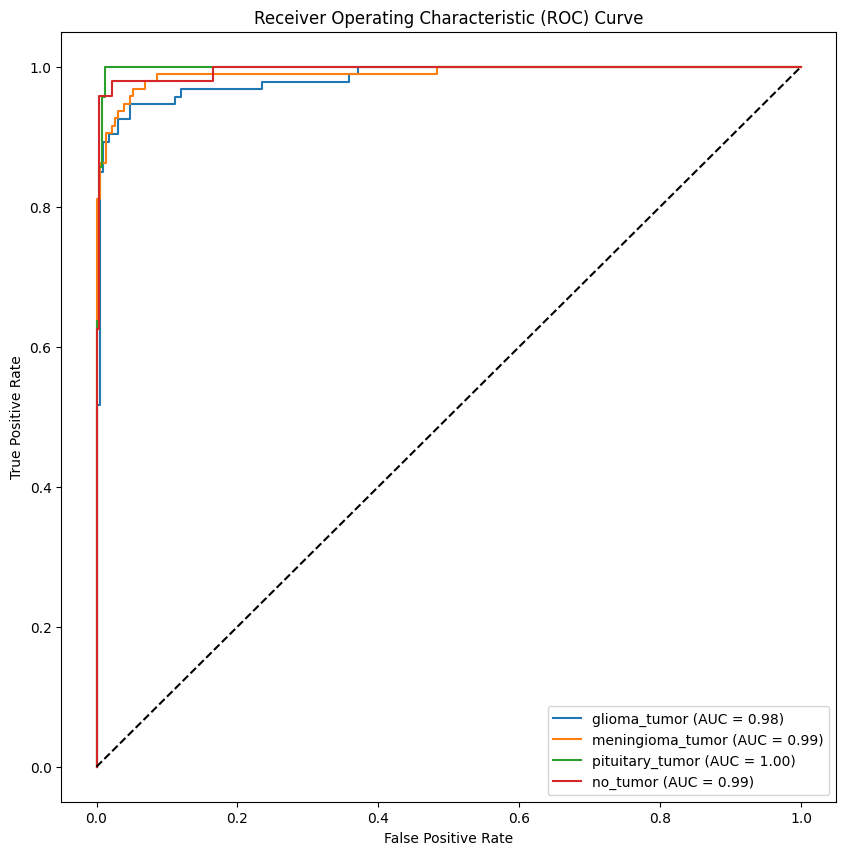

In [38]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 10))
for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **Loss and Accuracy Plots**


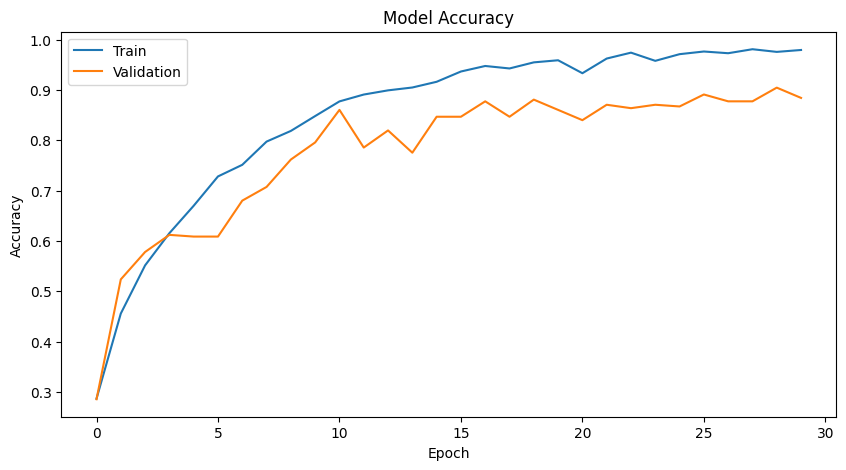

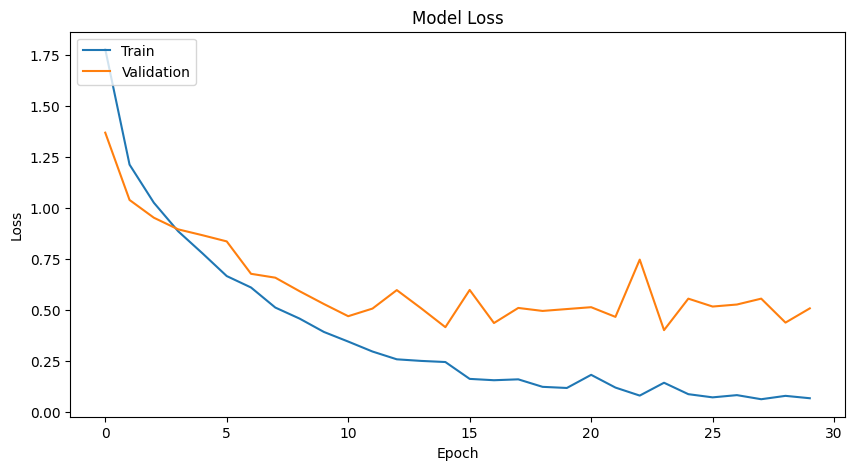

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **Saving the trained model**

In [40]:
model.save('braintumor.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
